# Sentiment Analysis using a subset of our data

#### In this notebook, we manually select a subset of artists from our corpus and perform sentiment analysis to determine the individual artists' emotion level. We also rank an artist's songs by sentiment, and analyze a specific songs' sentiment by verse.

##### Our analysis is based off Lab 11 code

# Configuration

In [2]:
#Importing annotated sentiment files
bing_pos_file = './opinion-lexicon-English/positive-words.txt'
bing_neg_file = './opinion-lexicon-English/negative-words.txt'
nrc_file = "./opinion-lexicon-English/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
syuzhet_file = "./opinion-lexicon-English/syuzhet.csv"
gi_file = "./opinion-lexicon-English/gi.csv"
my_pwd = 'C:/Users/karan/Documents/GitHub/text_analytics_final_project'

# Libraries

In [3]:
import sqlite3
import pandas as pd
import re

# Pragmas

In [4]:
%matplotlib inline
%cd {my_pwd}

C:\Users\karan\Documents\GitHub\text_analytics_final_project


# Process

## Import Bing lexicon

In [5]:
bing_list = [(word.strip(), 'bing_positive', 1) 
             for word in open(bing_pos_file, 'r').readlines() 
             if re.match(r'^\w+$', word)]
bing_list += [(word.strip(), 'bing_negative', 1) 
              for word in open(bing_neg_file, 'r').readlines() 
              if re.match(r'^\w+$', word)]

In [6]:
bing = pd.DataFrame(bing_list, columns=['term_str', 'polarity', 'val'])
bing = bing.set_index(['term_str','polarity'],append=True)
bing = bing.unstack().fillna(0).astype('int')
bing.columns = bing.columns.droplevel(0)

In [7]:
bing.sum()

polarity
bing_negative    4660
bing_positive    1904
dtype: int64

In [8]:
bing.head()

,polarity,bing_negative,bing_positive
,term_str,,
0,abound,0,1
1,abounds,0,1
2,abundance,0,1
3,abundant,0,1
4,accessable,0,1


In [9]:
bing=bing.reset_index(level=0)

In [10]:
bing.head()

polarity,level_0,bing_negative,bing_positive
term_str,,,
abound,0,0,1
abounds,1,0,1
abundance,2,0,1
abundant,3,0,1
accessable,4,0,1


### Create single sentiment column

In [11]:
bing['bing_sentiment'] = bing['bing_positive'] - bing['bing_negative']

In [12]:
bing.sample(10)

polarity,level_0,bing_negative,bing_positive,bing_sentiment
term_str,,,,
dauntless,380,0,1,1
gratification,815,0,1,1
plebeian,5133,1,0,-1
luck,1062,0,1,1
glut,3731,1,0,-1
applaud,110,0,1,1
invincibility,989,0,1,1
squabbling,5789,1,0,-1
adorer,38,0,1,1


## Import NRC lexicon

In [13]:
nrc = pd.read_csv(nrc_file, sep='\t', header=None)
nrc.columns = ['term_str','nrc_emotion','val']
nrc = nrc.set_index(['term_str','nrc_emotion'])
nrc = nrc.unstack()
nrc.columns = nrc.columns.droplevel(0)
nrc = nrc[nrc.sum(1) > 1]
nrc.columns = ['nrc_'+col for col in nrc.columns]

In [14]:
nrc.sum().sort_values(ascending=False)

nrc_negative        2366
nrc_fear            1368
nrc_positive        1281
nrc_anger           1208
nrc_sadness         1137
nrc_disgust         1004
nrc_trust            935
nrc_joy              686
nrc_anticipation     682
nrc_surprise         454
dtype: int64

In [15]:
nrc.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0


## Import Syuzhet lexicon

In [16]:
syu = pd.read_csv(syuzhet_file)
syu.columns = ['id','term_str','syu_sentiment']
syu = syu.drop('id', 1)
syu = syu.set_index('term_str')

In [17]:
syu.head()

,syu_sentiment
term_str,
abandon,-0.75
abandoned,-0.50
abandoner,-0.25
abandonment,-0.25
abandons,-1.00


## Import General Inquirer lexicon

This is prepared in a separate notebook.

In [18]:
gi = pd.read_csv(gi_file, index_col=['term_str'])
gi.columns = ['gi_sentiment']

In [19]:
gi.head()

,gi_sentiment
term_str,
abandon,-1
abandonment,-1
abate,-1
abdicate,-1
abhor,-1


## Combine all

In [20]:
combo = nrc.join(bing, how='outer')\
    .join(syu, how='outer')\
    .join(gi, how='outer')\
    .sort_index()

In [21]:
combo.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,level_0,bing_negative,bing_positive,bing_sentiment,syu_sentiment,gi_sentiment
term_str,,,,,,,,,,,,,,,,
abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,-0.75,-1.0
abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,-0.50,NaN
abandoner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN
abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,-0.25,-1.0
abandons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN


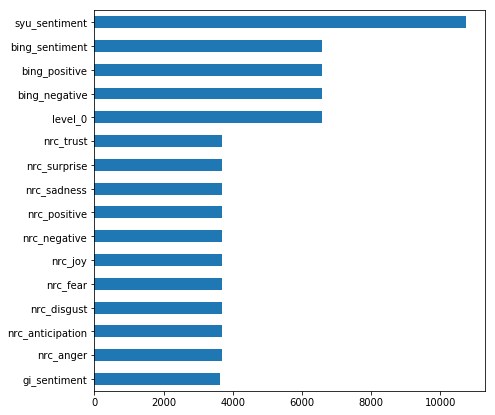

In [22]:
combo.count().sort_values().plot(kind='barh', figsize=(7,7))

# Save

In [23]:
with sqlite3.connect('lexicons.db') as db:
    nrc.to_sql('nrc', db, index=True, if_exists='replace')
    bing.to_sql('bing', db, index=True, if_exists='replace')
    syu.to_sql('syuzhet', db, index=True, if_exists='replace')
    gi.to_sql('gi', db, index=True, if_exists='replace')
    combo.to_sql('combo', db, index=True, if_exists='replace')        

# Get Ready for Sentiment Analysis

#### The default sentiment lexicon we use is syu_sentiment as it is the most robust metric we have, with multiple levels of sentiment between -1 and 1 for the largest amount of words.

In [24]:
lex_db = './lexicons.db'
# emo = 'bing_sentiment'
emo = 'syu_sentiment'

import pandas as pd
import numpy as np
import scipy as sp
import sys
import scipy.fftpack as fftpack
from sklearn.neighbors import KernelDensity as KDE
from sklearn.preprocessing import scale

import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [25]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

# Get Lexicons

In [26]:
with sqlite3.connect(lex_db) as db:
    combo = pd.read_sql('SELECT * FROM combo', db, index_col='term_str')

In [27]:
combo.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,level_0,bing_negative,bing_positive,bing_sentiment,syu_sentiment,gi_sentiment
term_str,,,,,,,,,,,,,,,,
abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,-0.75,-1.0
abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,-0.50,NaN
abandoner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN
abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,-0.25,-1.0
abandons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN


In [28]:
# get lexicon columns
emo_cols = combo.columns
emo_cols

Index(['nrc_anger', 'nrc_anticipation', 'nrc_disgust', 'nrc_fear', 'nrc_joy',
       'nrc_negative', 'nrc_positive', 'nrc_sadness', 'nrc_surprise',
       'nrc_trust', 'level_0', 'bing_negative', 'bing_positive',
       'bing_sentiment', 'syu_sentiment', 'gi_sentiment'],
      dtype='object')

# Get Text
#### We prepared the tokens and vocab table for our analysis in a seperate notebook.
#### The artists we are comparing today are David Guetta, Kanye West, Taylor Swift, Queen and Katy Perry


In [29]:
#We import our pre-created token and vocab csv files
import pandas as pd
tokens=pd.read_csv('subset_tokens.csv')
vocab=pd.read_csv('vocab_subset.csv')

In [30]:
tokens=tokens.set_index(['artist_id', 'song_id','verse_num','line_num'])

In [31]:
vocab=vocab.set_index('term_id')

In [32]:
tokens=tokens.rename(columns={'token_str':'term_str'})

In [33]:
#Merge sentiment lexicon with vocab
tokens = tokens.join(combo, on='term_str', how='left')

In [34]:
tokens.head()

token_num term_str  punc  num  \
artist_id song_id verse_num line_num                                  
86        9992    0         0                 0    hands     0    0   
                            0                 4  stretch     0    0   
                            0                10      got     0    0   
                            1                 0     give     0    0   
                            1                 6     best     0    0   

                                      nrc_anger  nrc_anticipation  \
artist_id song_id verse_num line_num                                
86        9992    0         0               NaN               NaN   
                            0               NaN               NaN   
                            0               NaN               NaN   
                            1               NaN               NaN   
                            1               NaN               NaN   

                                      nrc_disgust  nrc_fear  nrc_joy  \
artist_id song_id verse_num line_num                                   
86        9992    0         0                 NaN       NaN      NaN   
                            0                 NaN       NaN      NaN   
                            0                 NaN       NaN      NaN   
                            1                 NaN       NaN      NaN   
                            1                 NaN       NaN      NaN   

                                      nrc_negative  nrc_positive  nrc_sadness  \
artist_id song_id verse_num line_num                                            
86        9992    0         0                  NaN           NaN          NaN   
                            0                  NaN           NaN          NaN   
                            0                  NaN           NaN          NaN   
                            1                  NaN           NaN          NaN   
                            1                  NaN           NaN          NaN   

                                      nrc_surprise  nrc_trust  level_0  \
artist_id song_id verse_num line_num                                     
86        9992    0         0                  NaN        NaN      NaN   
                            0                  NaN        NaN      NaN   
                            0                  NaN        NaN      NaN   
                            1                  NaN        NaN      NaN   
                            1                  NaN        NaN    193.0   

                                      bing_negative  bing_positive  \
artist_id song_id verse_num line_num                                 
86        9992    0         0                   NaN            NaN   
                            0                   NaN            NaN   
                            0                   NaN            NaN   
                            1                   NaN            NaN   
                            1                   0.0            1.0   

                                      bing_sentiment  syu_sentiment  \
artist_id song_id verse_num line_num                                  
86        9992    0         0                    NaN            NaN   
                            0                    NaN            NaN   
                            0                    NaN            NaN   
                            1                    NaN            NaN   
                            1                    1.0            0.5   

                                      gi_sentiment  
artist_id song_id verse_num line_num                
86        9992    0         0                  NaN  
                            0                  NaN  
                            0                  NaN  
                            1                  1.0  
                            1                  1.0

In [35]:
tokens[emo_cols] = tokens[emo_cols].fillna(0)

In [36]:
tokens[emo].sample(10)

artist_id  song_id  verse_num  line_num
259        26414    2          2           0.00
264        26849    8          0          -0.75
86         10035    1          7          -0.75
261        26533    2          12         -0.75
424        42994    0          4           0.00
264        26790    4          1           0.00
           26785    0          0          -0.75
496        49411    2          13          0.00
261        26540    1          1          -0.25
86         10005    0          14          0.00
Name: syu_sentiment, dtype: float64

## Setup OHCO labels, allowing us to group sentiments by artist, verse or line depending on our analysis needs

In [37]:
#sentiment by OHCO
OHCO = ['artist_id', 'song_id', 'verse_num', 'line_num','token_num']

In [38]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)

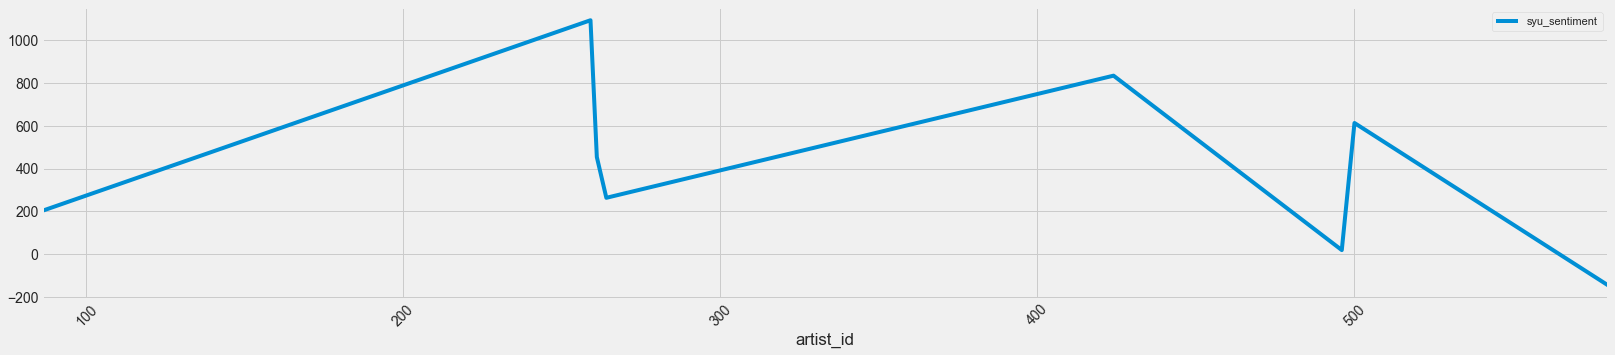

In [40]:
#By Artist, not that useful
tokens.groupby('artist_id')[emo].sum().plot(**FIG)

### Group sentiments by artists to determine most net 'positive' and 'negative' artist

In [41]:
# read in data that includes the names of the songs and artists to match with IDs
songs_df = pd.read_csv('songs_key_FULL.csv')
songs_df=songs_df.drop(columns=['Unnamed: 0', 'text'])
artists_df=pd.read_csv('artists_key.csv')
artists_df.columns=['artist_id','artist']
artist_song_df=pd.merge(songs_df,artists_df)
#artist_song_df = artist_song_df.drop(columns=['Unnamed: 0', 'text'])
#artist_song_df.head()

In [42]:
artist_sentiment=tokens.reset_index('artist_id')
artist_sentiment=pd.DataFrame(tokens.groupby('artist_id')[emo].sum())
artist_sentiment=artist_sentiment.reset_index('artist_id')
artist_sentiment=pd.merge(artist_sentiment,artists_df)

#### Surprisingly, David Guetta is the least positive artist, while Justin Beiber is the most positive artist.

In [43]:
artist_sentiment.head()

,artist_id,syu_sentiment,artist
0,86,202.25,David Guetta
1,259,1093.60,Justin Bieber
2,261,454.00,Kanye West
3,264,263.45,Katy Perry
4,424,834.50,Queen


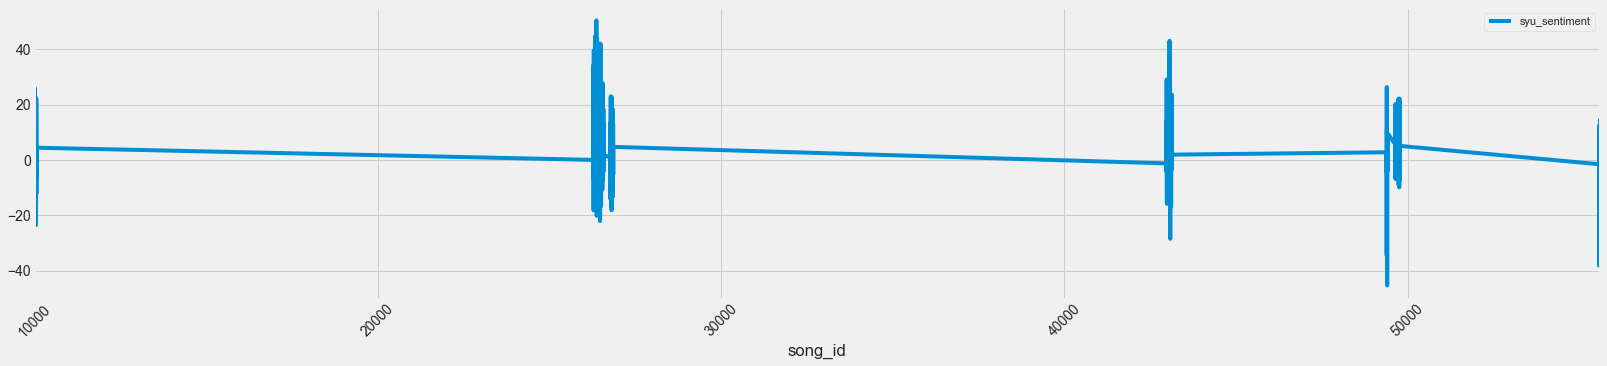

In [44]:
# Sentiment by Song, not a useful graph
tokens.groupby('song_id')[emo].sum().plot(**FIG)

## Let's compare the sentiments of each artist by song in a more useful way
#### Group each artist by their song sentiment 'score', sorting their songs by negative to positive sentiment. This allows us to observe which artist has the widest lyrical emotional range.

In [149]:
#Breaking down to a song level- let's check the sentiment scores for Kanye songs
kanye=tokens.reset_index('artist_id')
kanye=kanye[kanye.artist_id==261]
kanye=kanye.drop(columns='artist_id')
kanye_sentiment=kanye.groupby('song_id')[emo].sum()
kanye_sentiment=kanye_sentiment.reset_index('song_id')
kanye_sentiment=kanye_sentiment.drop(columns='song_id')
kanye_sentiment=kanye_sentiment.sort_values(by='syu_sentiment').reset_index().drop(columns='index')

# Do the same for each artist
bieber=tokens.reset_index('artist_id')
bieber=bieber[bieber.artist_id==259]
bieber=bieber.drop(columns='artist_id')
bieber_sentiment=pd.DataFrame(bieber.groupby('song_id')[emo].sum())
bieber_sentiment=bieber_sentiment.reset_index('song_id')
bieber_sentiment=bieber_sentiment.drop(columns='song_id')
bieber_sentiment=bieber_sentiment.sort_values(by='syu_sentiment').reset_index().drop(columns='index')

queen=tokens.reset_index('artist_id')
queen=queen[queen.artist_id==424]
queen=queen.drop(columns='artist_id')
queen_sentiment=pd.DataFrame(queen.groupby('song_id')[emo].sum())
queen_sentiment=queen_sentiment.reset_index('song_id')
queen_sentiment=queen_sentiment.drop(columns='song_id')
queen_sentiment=queen_sentiment.sort_values(by='syu_sentiment').reset_index().drop(columns='index')

katy=tokens.reset_index('artist_id')
katy=katy[katy.artist_id==264]
katy=katy.drop(columns='artist_id')
katy_sentiment=pd.DataFrame(katy.groupby('song_id')[emo].sum())
katy_sentiment=katy_sentiment.reset_index('song_id')
katy_sentiment=katy_sentiment.drop(columns='song_id')
katy_sentiment=katy_sentiment.sort_values(by='syu_sentiment').reset_index().drop(columns='index')

guetta=tokens.reset_index('artist_id')
guetta=guetta[guetta.artist_id==86]
guetta=guetta.drop(columns='artist_id')
guetta_sentiment=pd.DataFrame(guetta.groupby('song_id')[emo].sum())
guetta_sentiment=guetta_sentiment.reset_index('song_id')
guetta_sentiment=guetta_sentiment.drop(columns='song_id')
guetta_sentiment=guetta_sentiment.sort_values(by='syu_sentiment').reset_index().drop(columns='index')

### Sentiment plot
#### It seems like Queen has the most 'negative' song, while Justin Bieber has the most positive song. David Katy Perry seems to have the least amount of range, with most songs in the neutral sentiment range.

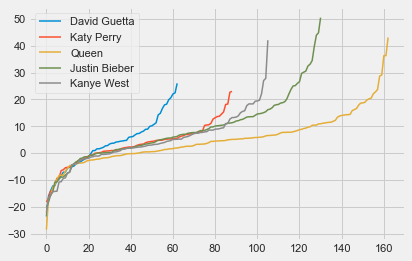

<Figure size 7200x72000 with 0 Axes>

In [176]:
# Let's plot
plt.plot(guetta_sentiment,label='David Guetta',linewidth=1.5)
plt.plot(katy_sentiment,label='Katy Perry',linewidth=1.5)
plt.plot(queen_sentiment,label='Queen',linewidth=1.5)
plt.plot(bieber_sentiment,label='Justin Bieber',linewidth=1.5)
plt.plot(kanye_sentiment,label='Kanye West',linewidth=1.5)
plt.legend()
plt.figure(figsize=(100,1000))
plt.show()

## Let's explore the sentiment scores for Kanye and Justin Beiber's songs

In [141]:
kanye_song_sentiment=pd.DataFrame(kanye.groupby('song_id')[emo].sum())

In [48]:
kanye_song_sentiment.head()

,syu_sentiment
song_id,
26476,-22.05
26477,4.70
26478,-2.55
26479,4.00
26480,7.45


In [49]:
kanye_song_sentiment=kanye_song_sentiment.reset_index()

In [50]:
kanye_song_sentiment=pd.merge(kanye_song_sentiment,songs_df)

#### Ranking Kanye song sentiments from highest to lowest

In [51]:
kanye_song_sentiment.sort_values(by=['syu_sentiment'],ascending=False)

,song_id,syu_sentiment,artist,song,artist_id
11,26487,42.05,Kanye West,Diamonds,261
71,26547,27.85,Kanye West,I Just Wanna Love U (Offcial Kanye West Mumtri...,261
58,26534,27.05,Kanye West,Good Friday,261
43,26519,22.10,Kanye West,Classic,261
59,26535,19.70,Kanye West,Good Life,261
17,26493,19.45,Kanye West,Family Business,261
85,26561,19.35,Kanye West,Pinocchio Story,261
96,26572,18.35,Kanye West,See Me Now,261
70,26546,18.35,Kanye West,I Got A Love,261
61,26537,18.35,Kanye West,Good Night,261


#### Let's check on our most positive artist, Justin Bieber


In [52]:
bieber=tokens.reset_index('artist_id')
bieber=bieber[bieber.artist_id==259]
bieber=bieber.drop(columns='artist_id')
bieber_swift_sentiment=pd.DataFrame(bieber.groupby('song_id')[emo].sum())


#### As I suspected, his score is inflated by his christmas album


In [53]:
bieber_swift_sentiment=bieber_swift_sentiment.reset_index()
bieber_swift_sentiment=pd.merge(bieber_swift_sentiment,songs_df)
bieber_swift_sentiment.sort_values(by=['syu_sentiment'],ascending=False)

,song_id,syu_sentiment,artist,song,artist_id
82,26367,50.45,Justin Bieber,Love Me Like You Do,259
47,26332,44.80,Justin Bieber,Baby,259
103,26388,43.90,Justin Bieber,Right Here,259
8,26293,39.65,Justin Bieber,Christmas Love,259
3,26288,34.45,Justin Bieber,As Long As You Love Me,259
64,26349,33.10,Justin Bieber,Favorite Girl,259
84,26369,32.45,Justin Bieber,Madly In Love (Bigger Than Life),259
39,26324,30.55,Justin Bieber,U Smile,259
14,26299,30.15,Justin Bieber,Forever,259
68,26353,29.70,Justin Bieber,Happy New Year,259


## Let's breakup a Queen song and explore its sentiment by verse
#### Bohemian Rhapsody seems interesting

In [109]:

queen=tokens.reset_index('artist_id')
queen=queen[queen.artist_id==424]
queen=queen.drop(columns='artist_id')
queen_swift_sentiment=pd.DataFrame(queen.groupby('song_id')[emo].sum())


In [110]:
queen_subset=queen.reset_index('song_id')
queen_subset=queen_subset[queen_subset.song_id==43037]
by_verse = queen_subset.groupby('verse_num')[emo_cols].sum()

In [111]:
tokens_queen=tokens.reset_index('song_id')
tokens_queen=tokens_queen[tokens_queen.song_id==43037]

In [112]:
#creating HTML dataframe for our sentiment analysis
tokens_queen['html'] =  tokens_queen.apply(lambda x: 
                               "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
by_verse['sent_str'] = tokens_queen.groupby('verse_num').term_str.apply(lambda x: x.str.cat(sep=' '))
by_verse['html_str'] = tokens_queen.groupby('verse_num').html.apply(lambda x: x.str.cat(sep=' '))


In [113]:
rows = []
for idx in by_verse.index:
    
    valence = round(by_verse.loc[idx, emo], 4)     
    t = 0
    if valence > t: color = '#ccffcc'
    elif valence < t: color = '#ffcccc'
    else: color = '#f2f2f2'
    z=0
    rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
    <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
    </tr>""".format(color, valence, by_verse.loc[idx, 'html_str'], idx))
    
display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

Sentiment,ID,Sentence
1.85,0,real life fantasy caught landslide escape reality open eyes look skies see poor boy need sympathy easy come easy go little high little low anyway wind blows really matter
-3.15,1,mama killed man put gun head pulled trigger dead mama life begun gone thrown away mama ooo mean make cry back time tomorrow carry carry nothing really matters
-0.8,2,late time come sends shivers spine body aching time goodbye everybody got go gotta leave behind face truth mama ooo anyway wind blows want die sometimes wish never born
-0.5,3,see little silhouetto man scaramouch scaramouch fandango thunderbolt lightning frightening gallileo gallileo gallileo gallileo gallileo figaro magnifico
0.6,4,poor boy nobody loves poor boy poor family spare life monstrosity easy come easy go let go bismillah let go let go bismillah let go let go bismillah let go let go let go let go never never let go let go never let go ooo oh mama mia mama mia mama mia let go beelzebub devil put aside
1.75,5,think stone spit eye think love leave die oh baby baby gotta get gotta get right outta
0.0,6,ooh yeah ooh yeah nothing really matters anyone see nothing really matters nothing really matters
0.0,7,anyway wind blows


## Apply Jocker's Transform

In [114]:
def get_transformed_values(raw_values, low_pass_size = 2, x_reverse_len = 100,  padding_factor = 2, scale_values = False, scale_range = False):

    if low_pass_size > len(raw_values):
        sys.exit("low_pass_size must be less than or equal to the length of raw_values input vector")

    raw_values_len = len(raw_values)
    padding_len = raw_values_len * padding_factor

    # Add padding, then fft
    values_fft = fftpack.fft(raw_values, padding_len)
    low_pass_size = low_pass_size * (1 + padding_factor)
    keepers = values_fft[:low_pass_size]

    # Preserve frequency domain structure
    modified_spectrum = list(keepers) \
        + list(np.zeros((x_reverse_len * (1+padding_factor)) - (2*low_pass_size) + 1)) \
        + list(reversed(np.conj(keepers[1:(len(keepers))])))
    
    
    # Strip padding
    inverse_values = fftpack.ifft(modified_spectrum)
    inverse_values = inverse_values[:x_reverse_len]

#     transformed_values = np.real(tuple(inverse_values))
    transformed_values = np.real(inverse_values)
    return transformed_values

In [115]:
FFTCFG = dict(
    low_pass_size = 3,
    x_reverse_len = 100,
    padding_factor = 2
)
X = get_transformed_values(by_verse[emo].values, **FFTCFG)

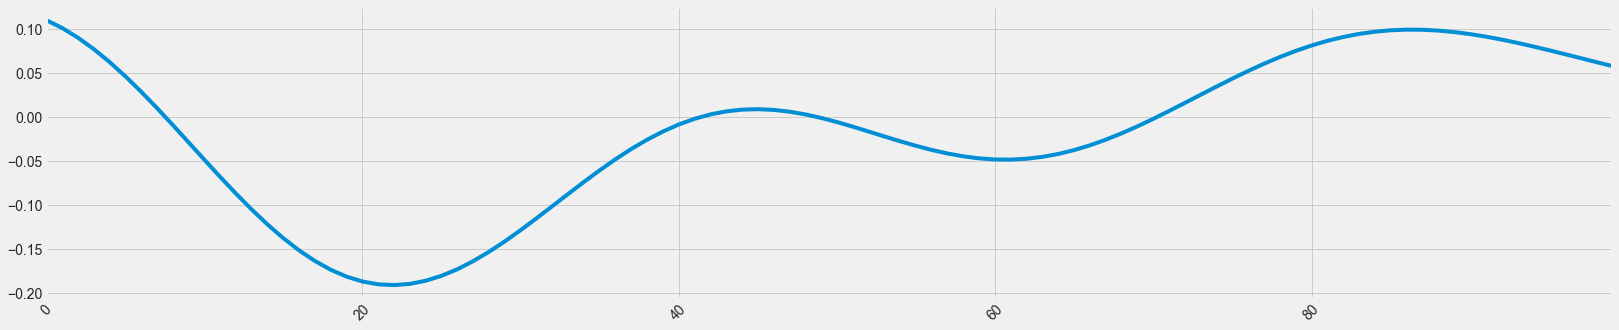

In [116]:
FIG['legend'] = False
pd.Series(X).plot(**FIG)